## PUBG  -  Outlier Detection & Feature Importance

#### In this notebook, we will carry out certain analysis with the different parameters/ variables & see their relation with the target variable. We will be using scatter plots & correlation plots for visualising our data. At the end, we will observe the outliers present in our data which may have effect on our analysis & will try to remove them all.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Reducing the size of our dataset using reduce_mem_usage

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
# Loading the train & test data

train_ds = pd.read_csv("D:/ANCHIT/Python/PUBG/pubg-finish-placement-prediction/train_V2.csv")
train_ds = reduce_mem_usage(train_ds)
test_ds = pd.read_csv("D:/ANCHIT/Python/PUBG/pubg-finish-placement-prediction/test_V2.csv")
test_ds = reduce_mem_usage(test_ds)

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 498.81 MB
Decreased by 49.3%
Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 225.31 MB
Decreased by 45.5%


In [4]:
train_ds.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [5]:
test_ds.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46875,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.12500,0,0,2,11,...,1503,2,4668.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40625,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,788.0,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.50000,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.25000,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2964.0,4,0


In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Id               category
 1   groupId          category
 2   matchId          category
 3   assists          int8    
 4   boosts           int8    
 5   damageDealt      float16 
 6   DBNOs            int8    
 7   headshotKills    int8    
 8   heals            int8    
 9   killPlace        int8    
 10  killPoints       int16   
 11  kills            int8    
 12  killStreaks      int8    
 13  longestKill      float16 
 14  matchDuration    int16   
 15  matchType        category
 16  maxPlace         int8    
 17  numGroups        int8    
 18  rankPoints       int16   
 19  revives          int8    
 20  rideDistance     float16 
 21  roadKills        int8    
 22  swimDistance     float16 
 23  teamKills        int8    
 24  vehicleDestroys  int8    
 25  walkDistance     float16 
 26  weaponsAcquire

In [7]:
# Checking for null values
train_ds.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
#Shape of the dataset

print('train_ds shape', train_ds.shape), print('test_ds shape', test_ds.shape)

train_ds shape (4446966, 29)
test_ds shape (1934174, 28)


(None, None)

#### Exploratory Data Analysis

In [9]:
# Finding the count of unique id's 
for i in ['Id', 'groupId', 'matchId']:
    print(f'unique [{i}] count', train_ds[i].nunique())

unique [Id] count 4446966
unique [groupId] count 2026745
unique [matchId] count 47965


In [10]:
# Average No. of persons killed & kill streaks

print("Average No. of persons killed are {:.2f}, 99% of people have {} kills or less & the maximum no. of kills are {}. Also, average kill streaks are {:.2f}".format(train_ds['kills'].mean(), train_ds['kills'].quantile(.99), train_ds['kills'].max(), train_ds['killStreaks'].mean()))

Average No. of persons killed are 0.92, 99% of people have 7.0 kills or less & the maximum no. of kills are 72. Also, average kill streaks are 0.54


In [11]:
# Analysing Boosts & Heals
print('Average no. of boosts & heals items taken are {:.2f} & {:.2f} respectively'. format(train_ds['boosts'].mean(), train_ds['heals'].mean()))

Average no. of boosts & heals items taken are 1.11 & 1.37 respectively


In [14]:
# Plotting between Heals & Boosts

data_train = train_ds['boosts']
data_train = train_ds['heals']

sns.pointplot(x='heals', y='winPlacePerc', data=data_train, color = 'red')
sns.pointplot(x='boosts', y='winPlacePerc', data=data_train, color = 'blue')

plt.show()

ValueError: Could not interpret input 'heals'

In [12]:
# Analysing Riding distance of the players

print("99% of people have taken {} rides or less & the maximum no. of rides are {}".format(train_ds['rideDistance'].quantile(.99), train_ds['rideDistance'].max()))

99% of people have taken 6968.0 rides or less & the maximum no. of rides are 40704.0


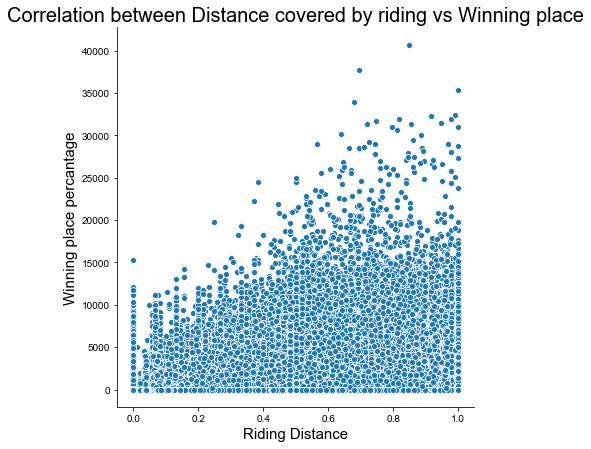

In [13]:
## Plotting the riding distance with the winning percantage

sns.relplot(x = 'winPlacePerc', y = 'rideDistance', kind = 'scatter', height = 6, data = train_ds)
sns.set(style = 'whitegrid')
plt.xlabel("Riding Distance", size=15)
plt.ylabel("Winning place percantage", size=15)
plt.title("Correlation between Distance covered by riding vs Winning place", size=20)
plt.show()

#### We can see in above graph that with an increase in the scatters for rideDistance, the winPlacePerc also increases. 

In [72]:
# Analysing the walking distance of the players

print("Max distance travelled on foot by a person is {} & total no. of people who walked 0 meters are {}".format(train_ds['walkDistance'].max(), len(train_ds[train_ds['walkDistance'] == 0])))

Max distance travelled on foot by a person is 25776.0 & total no. of people who walked 0 meters are 99603


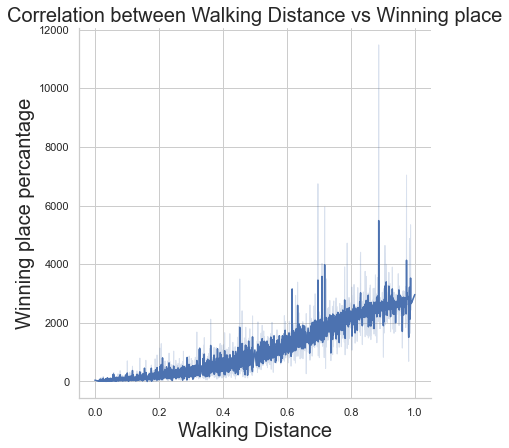

In [15]:
## Plotting the walking distance with the winning percantage

sns.relplot(x = 'winPlacePerc', y = 'walkDistance', kind = 'line', height = 6, data = train_ds)
sns.set(style = 'whitegrid')
plt.xlabel("Walking Distance", size=20)
plt.ylabel("Winning place percantage", size=20)
plt.title("Correlation between Walking Distance vs Winning place", size=20)
plt.show()

#### Similarly for increase in the scatters for walkDistance, the winPlacePerc scatters points also increase.

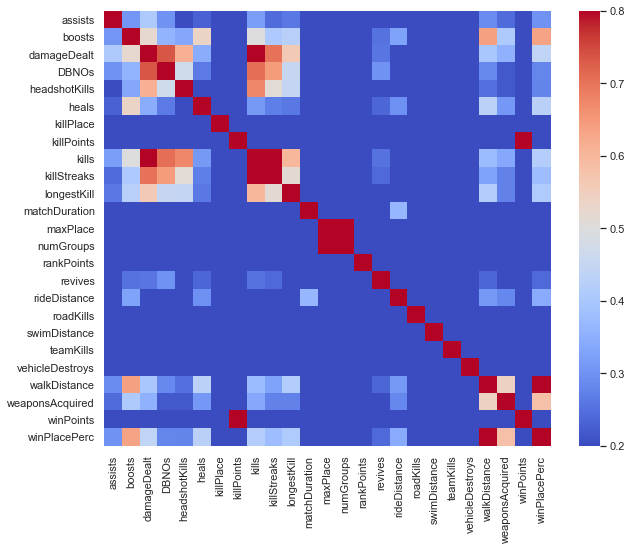

In [16]:
# Corr plot
data = train_ds.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data, cmap='coolwarm', vmin=0.2, vmax=0.8)

### Through the use of Correlation Plot we can observe that there is a high correlation between 'Walk Distance' & 'Win Place Percant' as we have seen in line plot. Also there is a significant correlation of 'Win Place Percant' with 'Boosts' & also with 'Weapons Acquired'

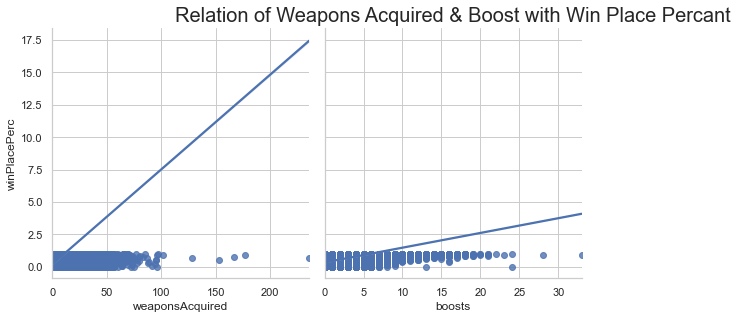

In [17]:
g = sns.PairGrid(train_ds, y_vars=["winPlacePerc"], x_vars=["weaponsAcquired", "boosts"], height=4, palette="tab10")
g.map(sns.regplot)

sns.set(style = 'whitegrid')
plt.title("Relation of Weapons Acquired & Boost with Win Place Percant", size=20)
plt.show()

### We have also seen between 'Boost' & 'Weapons Acquired' which one of them have a higher impact

## Removing Outliers

#### Outliers here are nothing but the frauds/ or users who are using cheat codes for the winning the game.
##### Feature Engineering - Creating a new feature out of the given features

In [100]:
train_ds['Total_Dist'] = train_ds['walkDistance'] + train_ds['swimDistance'] + train_ds['rideDistance']

In [101]:
# lets check who has considerably higher amount of kill streaks (average kill streaks are 0.54)

train_ds[(train_ds['killStreaks'] > 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist
124986,5641fc70c382fa,fb4d09d3c53a24,2258f78c7ef3d9,0,0,1400.0,0,4,0,1,...,0.000000,0,0.000000,0,0,901.50000,8,1500,0.534180,901.50000
539354,777a59f7dceb9c,1be852f783b980,d89c28b6a06ec5,0,0,1800.0,0,17,7,1,...,0.013802,0,0.000000,0,0,1117.00000,3,1503,0.702637,1117.00000
939616,e0772fdf8fe2cc,28bf339123983f,448ebbdc932c95,0,0,2188.0,0,15,1,1,...,0.000000,0,0.000000,0,0,1609.00000,10,1500,1.000000,1609.00000
999741,d5ce77c9e4db3b,34eb939dcb5076,9b10dae58bdf6e,0,0,1651.0,0,9,0,1,...,0.000000,0,0.000000,1,0,1074.00000,2,1498,0.647461,1074.00000
1041284,b034ad6da1fef8,0c8fa5a58cc5f1,4085af9bd6a5f1,0,2,1221.0,0,11,1,2,...,5396.000000,0,0.000000,0,0,751.50000,5,1500,0.895508,6148.00000
1391066,3aef2fa24ee496,ad85d53e6e8351,e182153a76fef9,0,3,809.0,0,11,4,1,...,1319.000000,0,130.250000,0,0,2192.00000,3,1376,0.780273,3640.00000
2035432,c7f45a94e7821b,96b732b014c2ff,c1b7f2198ec974,0,0,1300.0,0,8,0,1,...,0.000000,0,0.000000,0,0,935.00000,7,1500,0.666504,935.00000
2035747,acf8cdf5607908,c81d2e7bad5270,25201670f11e64,6,0,3304.0,0,18,1,1,...,0.000000,0,0.000000,0,0,52.46875,9,0,1.000000,52.46875
2203357,890e0c94607384,28970b7740efc9,227a91005fd232,0,2,1670.0,0,13,0,1,...,958.500000,0,0.000000,0,0,1744.00000,4,1506,0.933105,2702.00000
2371932,6a643baf07e913,22374cf84541c7,5e967019abbda8,0,1,1334.0,0,12,0,1,...,0.000000,0,0.000000,0,0,608.00000,5,1489,0.582520,608.00000


In [102]:
#Dropping higher kill streaks
train_ds.drop(train_ds[(train_ds['killStreaks'] > 10)].index, inplace=True)

In [103]:
# Perfect Headshots

train_ds['headshot_rate'] = train_ds['headshotKills']/ train_ds['kills']
train_ds[(train_ds['headshot_rate'] == 1) & (train_ds['kills'] > 5)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
43791,9afbe8ecaec518,19215cc89a51d7,0c70c2be6426f5,0,0,959.5,8,7,0,1,...,0,0.0,0,0,1823.0,4,0,0.583496,2824.0,1.0
45447,eb5516fd4df6fe,45c62861949040,6f46cd41d884d8,0,4,740.5,0,6,2,3,...,0,0.0,0,0,4404.0,4,0,0.989746,4404.0,1.0
66266,1a23298ecdb19d,d5d54b4be23079,e111ebb6185bc8,0,4,1469.0,9,8,0,2,...,0,0.0,0,0,2108.0,6,0,0.720215,4864.0,1.0
102499,d897450a550371,597f96e4f44ab8,afd45aeba13205,1,1,689.0,0,7,3,16,...,0,0.0,0,0,2420.0,12,1500,0.580566,4076.0,1.0
104571,cbebfd04b26842,90d0154538dfa3,b0a10671999dc9,0,4,1153.0,0,8,2,1,...,0,0.0,0,0,1898.0,4,1513,0.877930,3806.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408299,8c570d2fd6e771,671309d084cff4,81a1f3c91bdab3,0,11,881.0,7,9,2,1,...,0,0.0,0,0,3346.0,5,1556,0.869629,3346.0,1.0
4417654,e7693e6b92103b,b2a636d71aaea5,e7351dcf720ada,2,7,1083.0,7,7,6,3,...,0,0.0,0,0,2728.0,3,0,1.000000,7144.0,1.0
4428741,6892bbc8af99e3,1fdc1da60d6247,69f854bbfdf3a2,0,3,1180.0,7,12,1,1,...,0,0.0,0,0,1874.0,5,0,0.937500,1874.0,1.0
4433196,adcae24897f155,7f94e84d7c089d,bece980540324d,0,1,600.0,2,6,0,5,...,0,307.0,0,0,4876.0,3,0,0.791504,5184.0,1.0


In [104]:
# Dropping perfect headshots
train_ds.drop(train_ds[(train_ds['headshot_rate'] == 1) & (train_ds['kills'] > 5)].index, inplace = True)

In [105]:
# Killing wihout moving 

train_ds[(train_ds['Total_Dist'] == 0) & (train_ds['kills'] > 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000000,0,0,3,18,...,0,0.0,0,0,0.0,8,0,0.856934,0.0,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.500000,0,0,6,33,...,0,0.0,0,0,0.0,22,0,0.600098,0.0,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000000,0,4,5,3,...,0,0.0,0,0,0.0,13,0,0.894531,0.0,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.750000,0,0,0,69,...,0,0.0,0,0,0.0,7,1500,0.000000,0.0,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000000,0,1,0,37,...,0,0.0,0,0,0.0,10,0,0.300049,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316406,0,0,0,61,...,0,0.0,0,0,0.0,7,1500,0.888672,0.0,0.000000
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.812500,0,0,4,42,...,0,0.0,0,0,0.0,8,0,0.000000,0.0,0.000000
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.000000,7,2,16,26,...,0,0.0,0,0,0.0,7,1500,0.600098,0.0,0.333333
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.500000,9,2,0,18,...,0,0.0,1,0,0.0,16,1500,0.899902,0.0,0.222222


In [106]:
#Dropping killing w/o moving outliers

train_ds.drop(train_ds[(train_ds['Total_Dist'] == 0) & (train_ds['kills'] > 0)].index, inplace=True)

In [107]:
# Total distance travelled is 0 (ride , walk & swim)

train_ds[train_ds['Total_Dist'] == 0]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,NaN
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0,0.0,0,0,0.0,0,847,0.000000,0.0,NaN
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0,0.0,0,0,0.0,0,765,0.000000,0.0,NaN
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0,0.0,0,0,0.0,0,1510,0.000000,0.0,NaN
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0,0.0,0,0,0.0,0,0,0.127686,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0,0.0,0,0,0.0,0,0,0.000000,0.0,NaN
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0,0.0,0,0,0.0,0,1363,0.041199,0.0,NaN
4446905,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,...,0,0.0,0,0,0.0,1,0,0.041687,0.0,NaN
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0,0.0,0,0,0.0,0,916,0.000000,0.0,NaN


In [108]:
# Dropping distance travelled 0 users

train_ds.drop(train_ds[train_ds['Total_Dist'] == 0].index, inplace=True)

In [109]:
# Higher number of roadkills without driving

print('Average road kills: ', train_ds['roadKills'].mean())
train_ds[(train_ds['roadKills'] > 0) & (train_ds['rideDistance'] == 0)]

Average road kills:  0.003562111985461856


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
820,209314d1a20b48,72a26f1ded95d6,7abce2d2ca9e49,1,1,334.7500,4,0,1,17,...,1,0.0000,0,0,838.00000,6,1533,0.370361,838.00000,0.00
40362,81863d8837256d,af6e04e1b77f4b,59ad07f21f77dd,0,1,272.5000,1,1,2,22,...,1,127.6875,0,0,2444.00000,4,0,0.535645,2572.00000,0.50
46376,ed7575c25f2a5e,9be59a8d7ae94b,6c5c240ed3e339,2,5,299.0000,3,0,6,12,...,1,0.0000,0,0,3054.00000,4,1509,0.897949,3054.00000,0.00
50918,b5f8da95af493f,1a2f5a68a2720c,ae50bb56b6da4e,0,0,169.2500,1,0,0,39,...,1,0.0000,0,0,148.62500,1,0,0.133301,148.62500,0.00
55266,77178fffc09d09,86fd3da1738c43,620f0ea9a8c997,0,0,100.0000,2,0,0,31,...,1,0.0000,1,0,696.00000,3,0,0.370361,696.00000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,e32a8f224bee8a,a2f7c3e4f4ff2e,15fbf879405faf,0,3,329.0000,1,1,2,4,...,1,104.6250,0,0,2504.00000,4,1499,0.869629,2608.00000,0.25
4418648,8dc09552147fe2,0284db08778c3b,f9a88397f45677,0,0,96.4375,1,0,0,31,...,1,0.0000,0,0,1293.00000,3,1429,0.346191,1293.00000,0.00
4426830,c9df7b60fd1b00,b7460fb7ea1462,e31f8af291bb6e,0,0,100.0000,1,0,0,36,...,1,0.0000,0,0,29.40625,1,0,0.040009,29.40625,0.00
4444830,027b3f672516a1,766b70fa9c7750,4248befe3f7d28,0,6,443.0000,4,0,6,4,...,1,0.0000,0,0,2876.00000,5,1503,0.836914,2876.00000,0.00


In [110]:
# Dropping the rows

train_ds.drop(train_ds[(train_ds['roadKills'] > 0) & (train_ds['rideDistance'] == 0)].index, inplace=True)

In [112]:
# Longest duration of swimming

print('Average swim distance', train_ds['swimDistance'].max())
train_ds[train_ds['swimDistance'] > 1000]

Average swim distance 3824.0


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
18533,d8347ac3222087,4e44ea4cdee2bd,acacd3019c559e,0,0,0.0000,0,0,0,49,...,0,1171.0,0,0,914.000000,2,0,0.799805,8752.0,NaN
22118,07f9b9d5902fb2,b295dcb7e8d9c1,6fbad77aefbcdf,0,0,0.0000,0,0,0,45,...,0,1220.0,0,0,2068.000000,6,0,0.724121,3288.0,NaN
103053,de97d36ac07819,974c4035331f4c,a406a18fed67e0,0,3,228.7500,0,1,0,30,...,0,1233.0,0,0,968.000000,4,1551,0.893066,2200.0,1.0
136470,6bb82b3868591a,b8d975f6740b64,8c7212b87b1d67,1,1,179.5000,0,0,1,39,...,0,1205.0,0,0,1202.000000,4,0,0.936035,2408.0,NaN
154451,3795c59bfff6cd,585a9adfeb6c30,a3ccbc309208d3,0,0,0.0000,0,0,0,43,...,0,1315.0,0,0,3.208984,0,1557,0.888672,1318.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367340,3dcdefe2a6ee95,36d2203ab6eaa7,687a65fe8ee593,0,0,23.1875,0,0,0,43,...,0,1117.0,0,0,1800.000000,5,0,0.880371,2916.0,NaN
4368566,bf682a35eae9be,5098ce9e4d720b,b91b55a3907542,0,2,106.1250,1,0,1,45,...,0,1246.0,1,0,1553.000000,6,1447,0.785645,2866.0,NaN
4385765,9fd9cc36a3b3a6,e35bd8d43ad319,00c8ba4b170f30,0,0,0.0000,0,0,0,54,...,0,1462.0,0,0,1320.000000,5,0,0.620605,2782.0,NaN
4400566,91c054f0e992e3,8ed656c9091c0c,12700fbcb9d852,0,0,100.0000,1,1,0,25,...,0,1130.0,0,0,670.500000,0,1486,0.777832,2452.0,1.0


In [113]:
# Dropping longest duration swimming

train_ds.drop(train_ds[train_ds['swimDistance'] > 1000].index, inplace=True)

In [114]:
# Higher amount of heals used (Avg heals used are 1.34)

train_ds[train_ds['heals'] >20]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
369,b3f3ae8346665a,8838e498e6586e,0d0d51ca54ab0c,0,4,254.62500,1,1,24,20,...,0,0.000,0,0,3712.0,3,0,0.923340,5648.0,1.00
510,dc4d93b0eb152e,17cf37e13d8f0b,06635c0e0a492d,0,0,201.12500,1,0,25,25,...,0,0.000,1,0,2580.0,5,0,0.680664,3338.0,0.00
2296,3ff77e912b95a4,3da0a0610b6578,a9586bc2797969,0,5,0.00000,0,0,29,45,...,0,0.000,0,1,2042.0,6,0,0.926270,2800.0,NaN
2799,4f9967ec4b557f,54c19074233da5,636dd1f9650bf2,5,9,478.75000,1,0,23,5,...,0,0.000,0,0,2332.0,4,1515,0.976562,4996.0,0.00
3382,65fed9f9780f73,c09c5d8a071422,25e6c6db2241a9,0,3,672.50000,3,0,24,5,...,0,0.000,0,0,2628.0,6,1490,0.744629,6456.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442649,2d9089707dad60,b9aecfa82d6a24,adb60d5ac59350,0,2,100.00000,0,1,32,19,...,0,0.000,0,0,3130.0,6,0,0.893555,6640.0,1.00
4442899,54dbbd7c3d2939,1247aaa3eca522,46c351d191349e,0,5,0.00000,0,0,24,46,...,0,0.000,0,0,1436.0,9,0,0.812500,8152.0,NaN
4445077,6e4ad818e06a2a,44747af1c78484,1ecb495b7460b4,0,3,303.00000,3,1,23,6,...,0,0.000,0,0,1076.0,6,0,0.673828,2176.0,0.25
4446626,ffa53e8132e001,90a91b104852f8,dc8afb623b671d,0,9,0.00000,0,0,23,55,...,0,0.000,0,0,2330.0,9,1553,0.666504,2330.0,NaN


In [115]:
# Dropping higher valued heals

train_ds.drop(train_ds[train_ds['heals'] >20].index, inplace=True)

In [121]:
# Longest kills

print('99% of players have the longest kill distance of {} m or less whereas the Max kill distance recorded is {}'.format(train_ds['longestKill'].quantile(.99), train_ds['longestKill'].max()))

99% of players have the longest kill distance of 245.0 m or less whereas the Max kill distance recorded is 1094.0


In [122]:
# Longest kill distance outlier

train_ds[train_ds['longestKill'] > 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total_Dist,headshot_rate
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.00,8,5,7,18,...,0,0.0000,0,0,48.875,38,1500,0.538574,48.875,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.00,0,0,0,9,...,0,0.0000,0,0,1264.000,26,0,1.000000,2980.000,0.000000
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.75,0,0,0,51,...,0,0.0000,0,0,1074.000,22,0,0.000000,3158.000,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.00,11,5,0,5,...,0,0.0000,0,0,569.500,18,0,0.909180,569.500,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.25,0,0,2,45,...,0,0.0000,0,0,832.500,9,1500,0.285645,832.500,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.00,0,7,0,1,...,0,0.0000,0,0,2848.000,4,1500,0.941406,2848.000,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2104.00,0,4,11,11,...,0,0.0000,0,0,235.250,41,0,0.500000,235.250,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.00,0,6,5,15,...,0,0.0000,0,0,133.250,43,0,0.600098,133.250,0.545455
2122128,42df3102cb540b,7d9b2be15b355b,610d78f3affd2e,5,0,2500.00,0,7,1,2,...,0,0.0000,2,0,464.500,52,0,0.000000,464.500,0.318182
2152425,4b9f61bac5eb0a,bc717b964f3bbe,838cb9a3c94598,3,0,945.50,0,0,0,11,...,0,0.0000,0,0,844.500,14,0,0.571289,844.500,0.000000


In [123]:
# Dropping the outlier of longest kill

train_ds.drop(train_ds[train_ds['longestKill'] > 1000].index, inplace=True)

In [124]:
train_ds.shape

(4343122, 31)

### So we can see that we have reduced considerable amount of outliers.  We will now install XGBoost to carry out model builiding prediction

In [28]:
!pip3 install xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

## Model Training with XGBoost 

In [47]:
from xgboost import XGBRegressor

In [73]:
# Importing Normaliser for preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

train_ds.dropna(subset=["winPlacePerc"], inplace=True) # droping rows with missing labels

X = train_ds.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = train_ds["winPlacePerc"]

col_names = X.columns

nor = Normalizer().fit(X)
X = nor.transform(X)
X = pd.DataFrame(X, columns=col_names)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)
param = {
    'eta': .5, 
    'max_depth': 6,  
    'num_class': 2} 

steps = 50  # The number of training iterations
model = xgb.train(param, D_train, steps)

[23:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
ypred = model.predict(D_test)

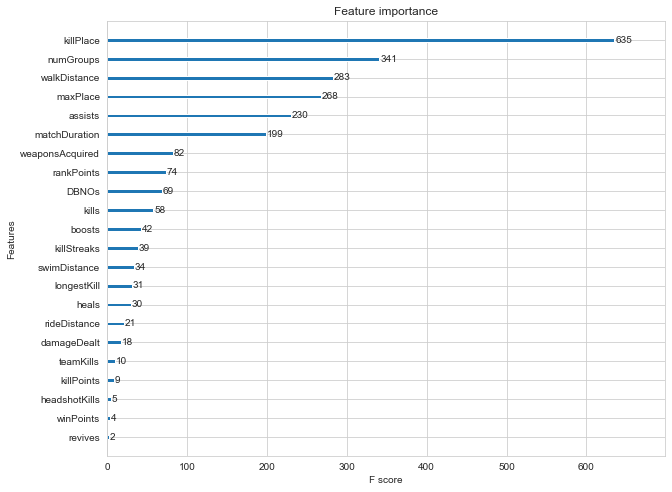

In [71]:
# Features Importance
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model, ax)
plt.show()

### We can see that killPlace holds the highest importance following with walkDistance, boosts & heals as we go further down.

In [75]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(x) for x in preds])

print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.3180647553269669


## Finally MSE calculated is 0.31. 